In [40]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('survey_results.csv')

df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [42]:
df.shape

(30010, 17)

In [43]:
df.describe()

,age
count,30010.000000
mean,33.047684
std,13.439250
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


### Identify and remove duplicates

In [44]:
df[df.duplicated()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [45]:
df.shape

(30010, 17)

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.shape

(30000, 17)

10 duplicate rows removed

### Handle outliers in age column

In [48]:
df[df['age'] > 100]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


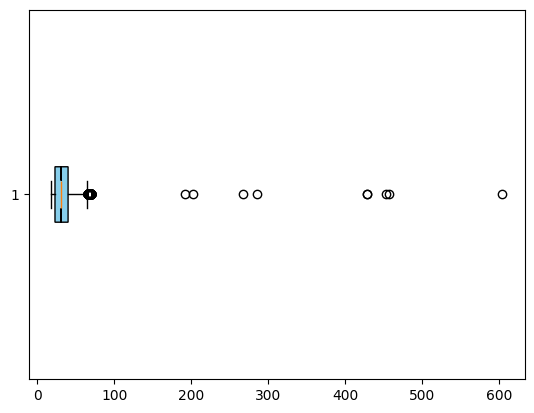

In [49]:
plt.boxplot(df['age'], notch=True, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.show()

In [50]:
df = df[df['age'] < 100]

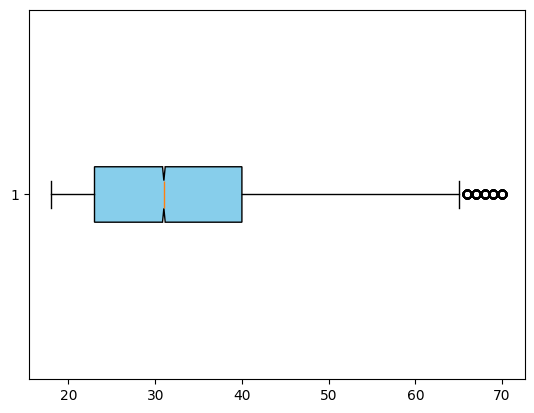

In [51]:
plt.boxplot(df['age'], notch=True, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.show()

Removed rows with age > 100 

### Handle missing values

In [52]:
df.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [53]:
df[df.isna().any(axis=1)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100
5,R00006,22,F,Urban,Student,NaN,5-7 times,Established,Large (1 L),2 to 4,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",100-150
11,R00012,23,F,Urban,Student,NaN,0-2 times,Established,Small (250 ml),0 to 1,Price,Exotic,Retail Store,Premium,Low (Not very concerned),Social (eg. Parties),50-100
14,R00015,22,M,Metro,Student,NaN,3-4 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
20,R00021,23,M,Semi-Urban,Student,NaN,3-4 times,Newcomer,Large (1 L),0 to 1,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R29986,24,F,Metro,Student,NaN,5-7 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150
29996,R29987,22,M,Urban,Student,NaN,0-2 times,Established,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),Social (eg. Parties),50-100
29999,R29990,23,F,Metro,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
30002,R29993,18,M,Metro,Student,NaN,0-2 times,Established,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150


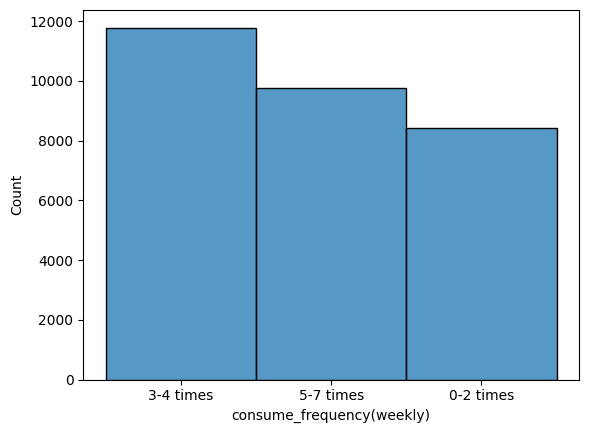

In [54]:
sns.histplot(df['consume_frequency(weekly)'])
plt.show()

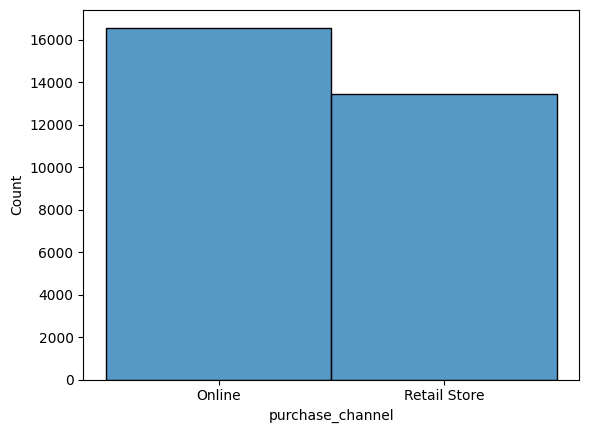

In [55]:
sns.histplot(df['purchase_channel'])
plt.show()

In [56]:
# Fill NA values of income_levels columns with 'Not Reported' value

df.fillna(
    {'income_levels': 'Not Reported',
      'consume_frequency(weekly)': df['consume_frequency(weekly)'].mode()[0],
      'purchase_channel': df['purchase_channel'].mode()[0]
    }, 
    inplace=True)

In [57]:
df.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

###  Correct spelling mistakes in categorical data

In [58]:
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [59]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [60]:
df['zone'] = df['zone'].replace({'Metor': 'Metro', 'urbna': 'Urban'})

In [61]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [62]:
df['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [63]:
df['current_brand'] = df['current_brand'].replace({'Establishd': 'Established', 'newcomer': 'Newcomer'})

In [64]:
df['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

In [65]:
df['typical_consumption_situations'].unique()

array(['Active (eg. Sports, gym)', 'Social (eg. Parties)',
       'Casual (eg. At home)'], dtype=object)

### Feature Engineering

### Categorize Age into Age Groups

In [66]:
def categorize(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 70:
        return '56-70'
    else:
        return '70+'
    

In [67]:
df['age_group'] = df['age'].apply(categorize)

In [68]:
df.sample(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
6624,R06622,28,M,Metro,Working Professional,<10L,3-4 times,Established,Small (250 ml),2 to 4,Availability,Exotic,Online,Simple,Low (Not very concerned),Social (eg. Parties),150-200,26-35
11190,R11186,66,M,Urban,Retired,10L - 15L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),Social (eg. Parties),100-150,56-70


In [69]:
df.drop('age', axis=1, inplace=True)

###  Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)

In [70]:
df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].replace({'0-2 times': 1, '3-4 times': 2, '5-7 times': 3})
df['awareness_of_other_brands'] = df['awareness_of_other_brands'].replace({'0 to 1': 1, '2 to 4': 2, 'above 4': 3})

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   29991 non-null  object
 1   gender                          29991 non-null  object
 2   zone                            29991 non-null  object
 3   occupation                      29991 non-null  object
 4   income_levels                   29991 non-null  object
 5   consume_frequency(weekly)       29991 non-null  int64 
 6   current_brand                   29991 non-null  object
 7   preferable_consumption_size     29991 non-null  object
 8   awareness_of_other_brands       29991 non-null  int64 
 9   reasons_for_choosing_brands     29991 non-null  object
 10  flavor_preference               29991 non-null  object
 11  purchase_channel                29991 non-null  object
 12  packaging_preference            29991 non-null  obj

In [72]:
df['cf_ab_score'] = round(df['consume_frequency(weekly)'] / (df['consume_frequency(weekly)'] + df['awareness_of_other_brands']), 2)

In [73]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,Not Reported,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


### Create Zone Affluence Score (ZAS)

In [74]:
df['zone'] = df['zone'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban': 3, 'Metro': 4})
df['income_levels'] = df['income_levels'].replace({'<10L': 1, '10L - 15L': 2, '16L - 25L': 3, '26L - 35L': 4, '> 35L': 5, 'Not Reported': 0})

In [75]:
df.sample(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
29918,R29909,M,2,Student,0,1,Newcomer,Medium (500 ml),1,Price,Traditional,Retail Store,Simple,Low (Not very concerned),Casual (eg. At home),50-100,18-25,0.50
19371,R19365,F,3,Entrepreneur,2,1,Established,Small (250 ml),3,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200,26-35,0.25


In [76]:
df['zas_score'] = df['zone'] * df['income_levels']
df.sample(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
23715,R23707,M,1,Working Professional,3,2,Established,Small (250 ml),2,Brand Reputation,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,18-25,0.5,3
22450,R22443,F,2,Working Professional,5,1,Established,Small (250 ml),1,Brand Reputation,Traditional,Online,Premium,High (Very health-conscious),Social (eg. Parties),200-250,36-45,0.5,10


### Brand Switching Indicator (BSI)

In [77]:
df['bsi'] = df.apply(lambda row: 1 if (row['current_brand'] != 'Established' and (row['reasons_for_choosing_brands'] in ['Price', 'Quality'])) else 0, axis=1)

In [78]:
df.sample(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
2922,R02921,F,1,Working Professional,1,1,Newcomer,Medium (500 ml),1,Price,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),50-100,18-25,0.5,1,1
2518,R02518,F,3,Entrepreneur,3,3,Established,Medium (500 ml),2,Quality,Traditional,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),200-250,36-45,0.6,9,0


### Removing Logical Outliers

In [79]:
pd.crosstab(df['age_group'], df['occupation'], margins=True, margins_name='Total')

occupation,Entrepreneur,Retired,Student,Working Professional,Total
age_group,,,,,
18-25,535,0,7328,2605,10468
26-35,1826,0,697,6570,9093
36-45,1619,0,0,4353,5972
46-55,799,0,0,2167,2966
56-70,221,1130,35,106,1492
Total,5000,1130,8060,15801,29991


In [80]:
df.shape

(29991, 20)

In [81]:
df = df[((df['age_group']=='56-70') & (df['occupation'] == 'Student'))==False]

In [82]:
df.shape

(29956, 20)

In [83]:
df[df['bsi'] == 0]

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0
5,R00006,F,3,Student,0,3,Established,Large (1 L),2,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",100-150,18-25,0.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30004,R29995,M,2,Retired,1,3,Newcomer,Small (250 ml),2,Availability,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.60,2,0
30005,R29996,M,4,Working Professional,3,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35,0.50,12,0
30006,R29997,F,3,Working Professional,5,2,Established,Small (250 ml),2,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,36-45,0.50,15,0
30007,R29998,F,4,Retired,1,1,Established,Medium (500 ml),1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200,56-70,0.50,4,0


### Modelling

In [84]:
df.sample(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
8461,R08458,M,2,Student,0,2,Established,Small (250 ml),2,Price,Exotic,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100,18-25,0.5,0,0
11986,R11981,M,2,Working Professional,1,2,Newcomer,Small (250 ml),2,Availability,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150,26-35,0.5,2,0


### Feature Encoding

In [85]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [86]:
# Label encoding
df['age_group'] = df['age_group'].map({'26-35': 2, '46-55': 4, '36-45': 3, '18-25': 1, '56-70': 5})
df['health_concerns'] = df['health_concerns'].map({'Medium (Moderately health-conscious)': 2, 'Low (Not very concerned)': 1,'High (Very health-conscious)': 3})
df['preferable_consumption_size'] = df['preferable_consumption_size'].map({'Medium (500 ml)': 2, 'Large (1 L)': 3, 'Small (250 ml)': 1})
df['price_range'] = df['price_range'].map({'100-150': 1, '200-250': 3, '150-200': 2, '50-100': 0})

In [87]:
df.sample(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
14279,R14274,F,3,Entrepreneur,3,1,Established,2,2,Brand Reputation,Exotic,Online,Eco-Friendly,3,Casual (eg. At home),2,2,0.33,9,0
8913,R08909,M,4,Student,0,1,Established,2,2,Availability,Traditional,Online,Premium,1,"Active (eg. Sports, gym)",1,1,0.33,0,0


In [88]:
# One hot encoding
nominal_cols = ['gender', 'occupation', 'current_brand','reasons_for_choosing_brands', 'flavor_preference', 
                'purchase_channel','packaging_preference','typical_consumption_situations']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
df.head(3)

,respondent_id,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,price_range,age_group,cf_ab_score,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
0,R00001,3,1,2,2,1,2,1,2,0.67,...,True,False,True,False,True,False,False,True,False,False
1,R00002,4,5,3,2,2,2,3,4,0.60,...,False,False,False,True,False,True,True,False,False,True
2,R00003,1,5,2,2,2,2,3,3,0.50,...,True,False,False,False,True,True,True,False,False,False


In [89]:
from sklearn.model_selection import train_test_split

X = df.drop(['respondent_id', 'price_range'], axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
X.columns

Index(['zone', 'income_levels', 'consume_frequency(weekly)',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'health_concerns', 'age_group', 'cf_ab_score', 'zas_score', 'bsi',
       'gender_M', 'occupation_Retired', 'occupation_Student',
       'occupation_Working Professional', 'current_brand_Newcomer',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')

In [831]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.42      0.92      0.58       906
           1       0.46      0.26      0.33      1930
           2       0.59      0.34      0.43      2223
           3       0.70      0.89      0.78      2430

    accuracy                           0.57      7489
   macro avg       0.54      0.60      0.53      7489
weighted avg       0.57      0.57      0.54      7489



In [832]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.4180819180819181,
  'recall': 0.9238410596026491,
  'f1-score': 0.5756533700137552,
  'support': 906.0},
 '1': {'precision': 0.45646196150320806,
  'recall': 0.25803108808290154,
  'f1-score': 0.32969215491559084,
  'support': 1930.0},
 '2': {'precision': 0.5925349922239502,
  'recall': 0.3427800269905533,
  'f1-score': 0.4343117697349672,
  'support': 2223.0},
 '3': {'precision': 0.6967845659163987,
  'recall': 0.8917695473251028,
  'f1-score': 0.7823104693140794,
  'support': 2430.0},
 'accuracy': 0.5693684069969288,
 'macro avg': {'precision': 0.5409658594313688,
  'recall': 0.6041054305003017,
  'f1-score': 0.5304919409945982,
  'support': 7489.0},
 'weighted avg': {'precision': 0.5701890220822673,
  'recall': 0.5693684069969288,
  'f1-score': 0.5373664463578044,
  'support': 7489.0}}

In [838]:
import mlflow

mlflow.set_experiment("Beverage price prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name='Navie Bayes'):
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy']
    })
    mlflow.sklearn.log_model(model, "Navie Bayes")

2025/04/10 22:44:29 INFO mlflow.tracking.fluent: Experiment with name 'Beverage price prediction' does not exist. Creating a new experiment.
2025/04/10 22:44:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Navie Bayes at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/c8b36ae12c1747d5adf5cc4f89328d9e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491


In [839]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)


{'0': {'precision': 0.8420413122721749, 'recall': 0.7649006622516556, 'f1-score': 0.8016194331983806, 'support': 906.0}, '1': {'precision': 0.7778335005015045, 'recall': 0.8036269430051813, 'f1-score': 0.790519877675841, 'support': 1930.0}, '2': {'precision': 0.7784781629896443, 'recall': 0.7777777777777778, 'f1-score': 0.7781278127812782, 'support': 2223.0}, '3': {'precision': 0.8926968584251326, 'recall': 0.9004115226337449, 'f1-score': 0.8965375947551731, 'support': 2430.0}, 'accuracy': 0.8226732541060222, 'macro avg': {'precision': 0.822762458547114, 'recall': 0.8116792264170899, 'f1-score': 0.8167011796026682, 'support': 7489.0}, 'weighted avg': {'precision': 0.8230629466131052, 'recall': 0.8226732541060222, 'f1-score': 0.8225844643423631, 'support': 7489.0}}


In [851]:
with mlflow.start_run(run_name='Logistic Regression'):
    mlflow.log_metrics({
        'accuracy': report['accuracy']
    })
    mlflow.sklearn.log_model(model, "Logistic Regression")

2025/04/10 22:51:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/15a09fb362da4b5faae00a8b51d27558
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491


In [841]:
from sklearn.svm import SVC

model = SVC()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

{'0': {'precision': 0.8478260869565217, 'recall': 0.7748344370860927, 'f1-score': 0.8096885813148789, 'support': 906.0}, '1': {'precision': 0.7891837756634953, 'recall': 0.816580310880829, 'f1-score': 0.8026483320600968, 'support': 1930.0}, '2': {'precision': 0.8028356225077536, 'recall': 0.815114709851552, 'f1-score': 0.8089285714285714, 'support': 2223.0}, '3': {'precision': 0.9194017449106772, 'recall': 0.9106995884773662, 'f1-score': 0.9150299772586313, 'support': 2430.0}, 'accuracy': 0.8416343971157698, 'macro avg': {'precision': 0.839811807509612, 'recall': 0.82930726157396, 'f1-score': 0.8340738655155446, 'support': 7489.0}, 'weighted avg': {'precision': 0.8425831153399435, 'recall': 0.8416343971157698, 'f1-score': 0.8418293756938785, 'support': 7489.0}}


In [850]:
with mlflow.start_run(run_name='SVM'):
    mlflow.log_metrics({
        'accuracy': report['accuracy']
    })
    mlflow.sklearn.log_model(model, "SVM")

2025/04/10 22:51:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/0ee2defdd935495c8ce17279fed9e0d8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491


In [843]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

{'0': {'precision': 0.9202733485193622, 'recall': 0.891832229580574, 'f1-score': 0.905829596412556, 'support': 906.0}, '1': {'precision': 0.8941798941798942, 'recall': 0.8756476683937824, 'f1-score': 0.8848167539267016, 'support': 1930.0}, '2': {'precision': 0.8549222797927462, 'recall': 0.8906882591093117, 'f1-score': 0.8724388631857237, 'support': 2223.0}, '3': {'precision': 0.9413721413721414, 'recall': 0.9316872427983539, 'f1-score': 0.9365046535677353, 'support': 2430.0}, 'accuracy': 0.9002537054346375, 'macro avg': {'precision': 0.902686915966036, 'recall': 0.8974638499705055, 'f1-score': 0.8998974667731792, 'support': 7489.0}, 'weighted avg': {'precision': 0.9009963120629343, 'recall': 0.9002537054346375, 'f1-score': 0.9004561156976593, 'support': 7489.0}}


In [849]:
with mlflow.start_run(run_name='Random Forest'):
    mlflow.log_metrics({
        'accuracy': report['accuracy']
    })
    mlflow.sklearn.log_model(model, "Random Forest")

2025/04/10 22:51:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/b33fee609bf3478495a547b6b3c73942
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491


In [845]:
from xgboost import XGBClassifier

model = XGBClassifier()  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

{'0': {'precision': 0.9183222958057395, 'recall': 0.9183222958057395, 'f1-score': 0.9183222958057395, 'support': 906.0}, '1': {'precision': 0.9171066525871172, 'recall': 0.9, 'f1-score': 0.9084728033472803, 'support': 1930.0}, '2': {'precision': 0.8959894226531512, 'recall': 0.9145299145299145, 'f1-score': 0.9051647373107747, 'support': 2223.0}, '3': {'precision': 0.9557851239669422, 'recall': 0.9518518518518518, 'f1-score': 0.9538144329896907, 'support': 2430.0}, 'accuracy': 0.9233542529042595, 'macro avg': {'precision': 0.9218008737532375, 'recall': 0.9211760155468764, 'f1-score': 0.9214435673633713, 'support': 7489.0}, 'weighted avg': {'precision': 0.9235356091989264, 'recall': 0.9233542529042595, 'f1-score': 0.9233946846931568, 'support': 7489.0}}


In [847]:
with mlflow.start_run(run_name='XGBoost'):
    mlflow.log_metrics({
        'accuracy': report['accuracy']
    })
    mlflow.xgboost.log_model(model, "XGBoost")

2025/04/10 22:48:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/055c8d7c81bd459e8aa040752c1001da
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491


In [853]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 24
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
{'0': {'precision': 0.9283314669652856, 'recall': 0.9150110375275938, 'f1-score': 0.9216231239577543, 'support': 906.0}, '1': {'precision': 0.9173684210526316, 'recall': 0.9031088082901555, 'f1-score': 0.9101827676240208, 'support': 1930.0}, '2': {'precision': 0.8985952589991221, 'recall': 0.9208277103013945, 'f1-score': 0.9095756498555877, 'support':

In [855]:
with mlflow.start_run(run_name='Lightweight Gradient Boost Machine'):
    mlflow.log_metrics({
        'accuracy': report['accuracy']
    })
    mlflow.lightgbm.log_model(model, "Lightweight Gradient Boost Machine")

2025/04/10 22:53:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lightweight Gradient Boost Machine at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/2ac071fbce124a5784b417ce308e3a3c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491


In [856]:
import dagshub
dagshub.init(repo_owner='rabbanimunna12', repo_name='Beverage_Price_Prediction', mlflow=True)

Accessing as rabbanimunna12

Initialized MLflow to track repo "rabbanimunna12/Beverage_Price_Prediction"

Repository rabbanimunna12/Beverage_Price_Prediction initialized!

In [858]:
# with mlflow.start_run(run_name='Navie Bayes'):
#     mlflow.log_metrics({
#         'accuracy': report_dict['accuracy']
#     })
#     mlflow.sklearn.log_model(model, "Navie Bayes")


import mlflow
with mlflow.start_run(run_name='Navie Bayes'):
  # Your training code here...
  mlflow.log_metric('accuracy', report_dict['accuracy'])

🏃 View run Navie Bayes at: http://127.0.0.1:5000/#/experiments/213212803550683491/runs/5cab78fb8036426b84089ec6e3c512ed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/213212803550683491
